# 9.1 Ising Model

In [1]:
using LinearAlgebra
using Plots
using Colors
using Statistics
using Polynomials
using StatsBase
gr()

Plots.GRBackend()

Init function that configures the intial array (we assume $k_B = 1$)

In [119]:
function init(L, T, J)
    matrix = zeros(L, L)
    for i in 1:L
        for j in 1:L
            matrix[i, j] = rand([-1, 1]) #the initial matrix
        end
    end
    beta = J / T #the value for beta with k_B = 1
    Ps = [exp(-8 * beta), exp(-4 * beta), 1, exp(4 * beta), exp(8 * beta)] #array filled with allowed values of e^(-beta deltaE)
    return matrix, Ps
end

init (generic function with 1 method)

Function that calculates the delta of the energy and returns the value of $\frac{P(y)}{P(x)}$

In [120]:
function energy(Ps, i, j, matrix, L) #change of spin of the matrix[i, j] element
    #We apply the periodic boundary conditions
    a = i - 1
    b = i + 1
    c = j - 1
    d = j + 1 
    if i == 1
        a = L
    elseif i == L
        b = 1
    end
    if j == 1
        c = L
    elseif j == L
        d = 1
    end
    deltaE = - 2 * matrix[i, j] * (matrix[b, j] + matrix[a, j] + matrix[i, d] + matrix[i, c]) #the change in energy using the formula given in the textbook
    index = Int(deltaE / 4 + 3) #this turns the values of -8, -4, 0, 4, 8 to 1, 2, 3, 4, 5 respectively to be used as indices for Ps
    P = Ps[index]
    return P
end

energy (generic function with 1 method)

Function that takes a step using the metropolis condition

In [121]:
function step(matrix, Ps, L)
    i = rand(1:L)
    j = rand(1:L)
    if rand() <  energy(Ps, i, j, matrix, L)
        matrix[i, j] = - matrix[i, j]
    end
    return matrix
end

step (generic function with 1 method)

We test the steps process using the following code

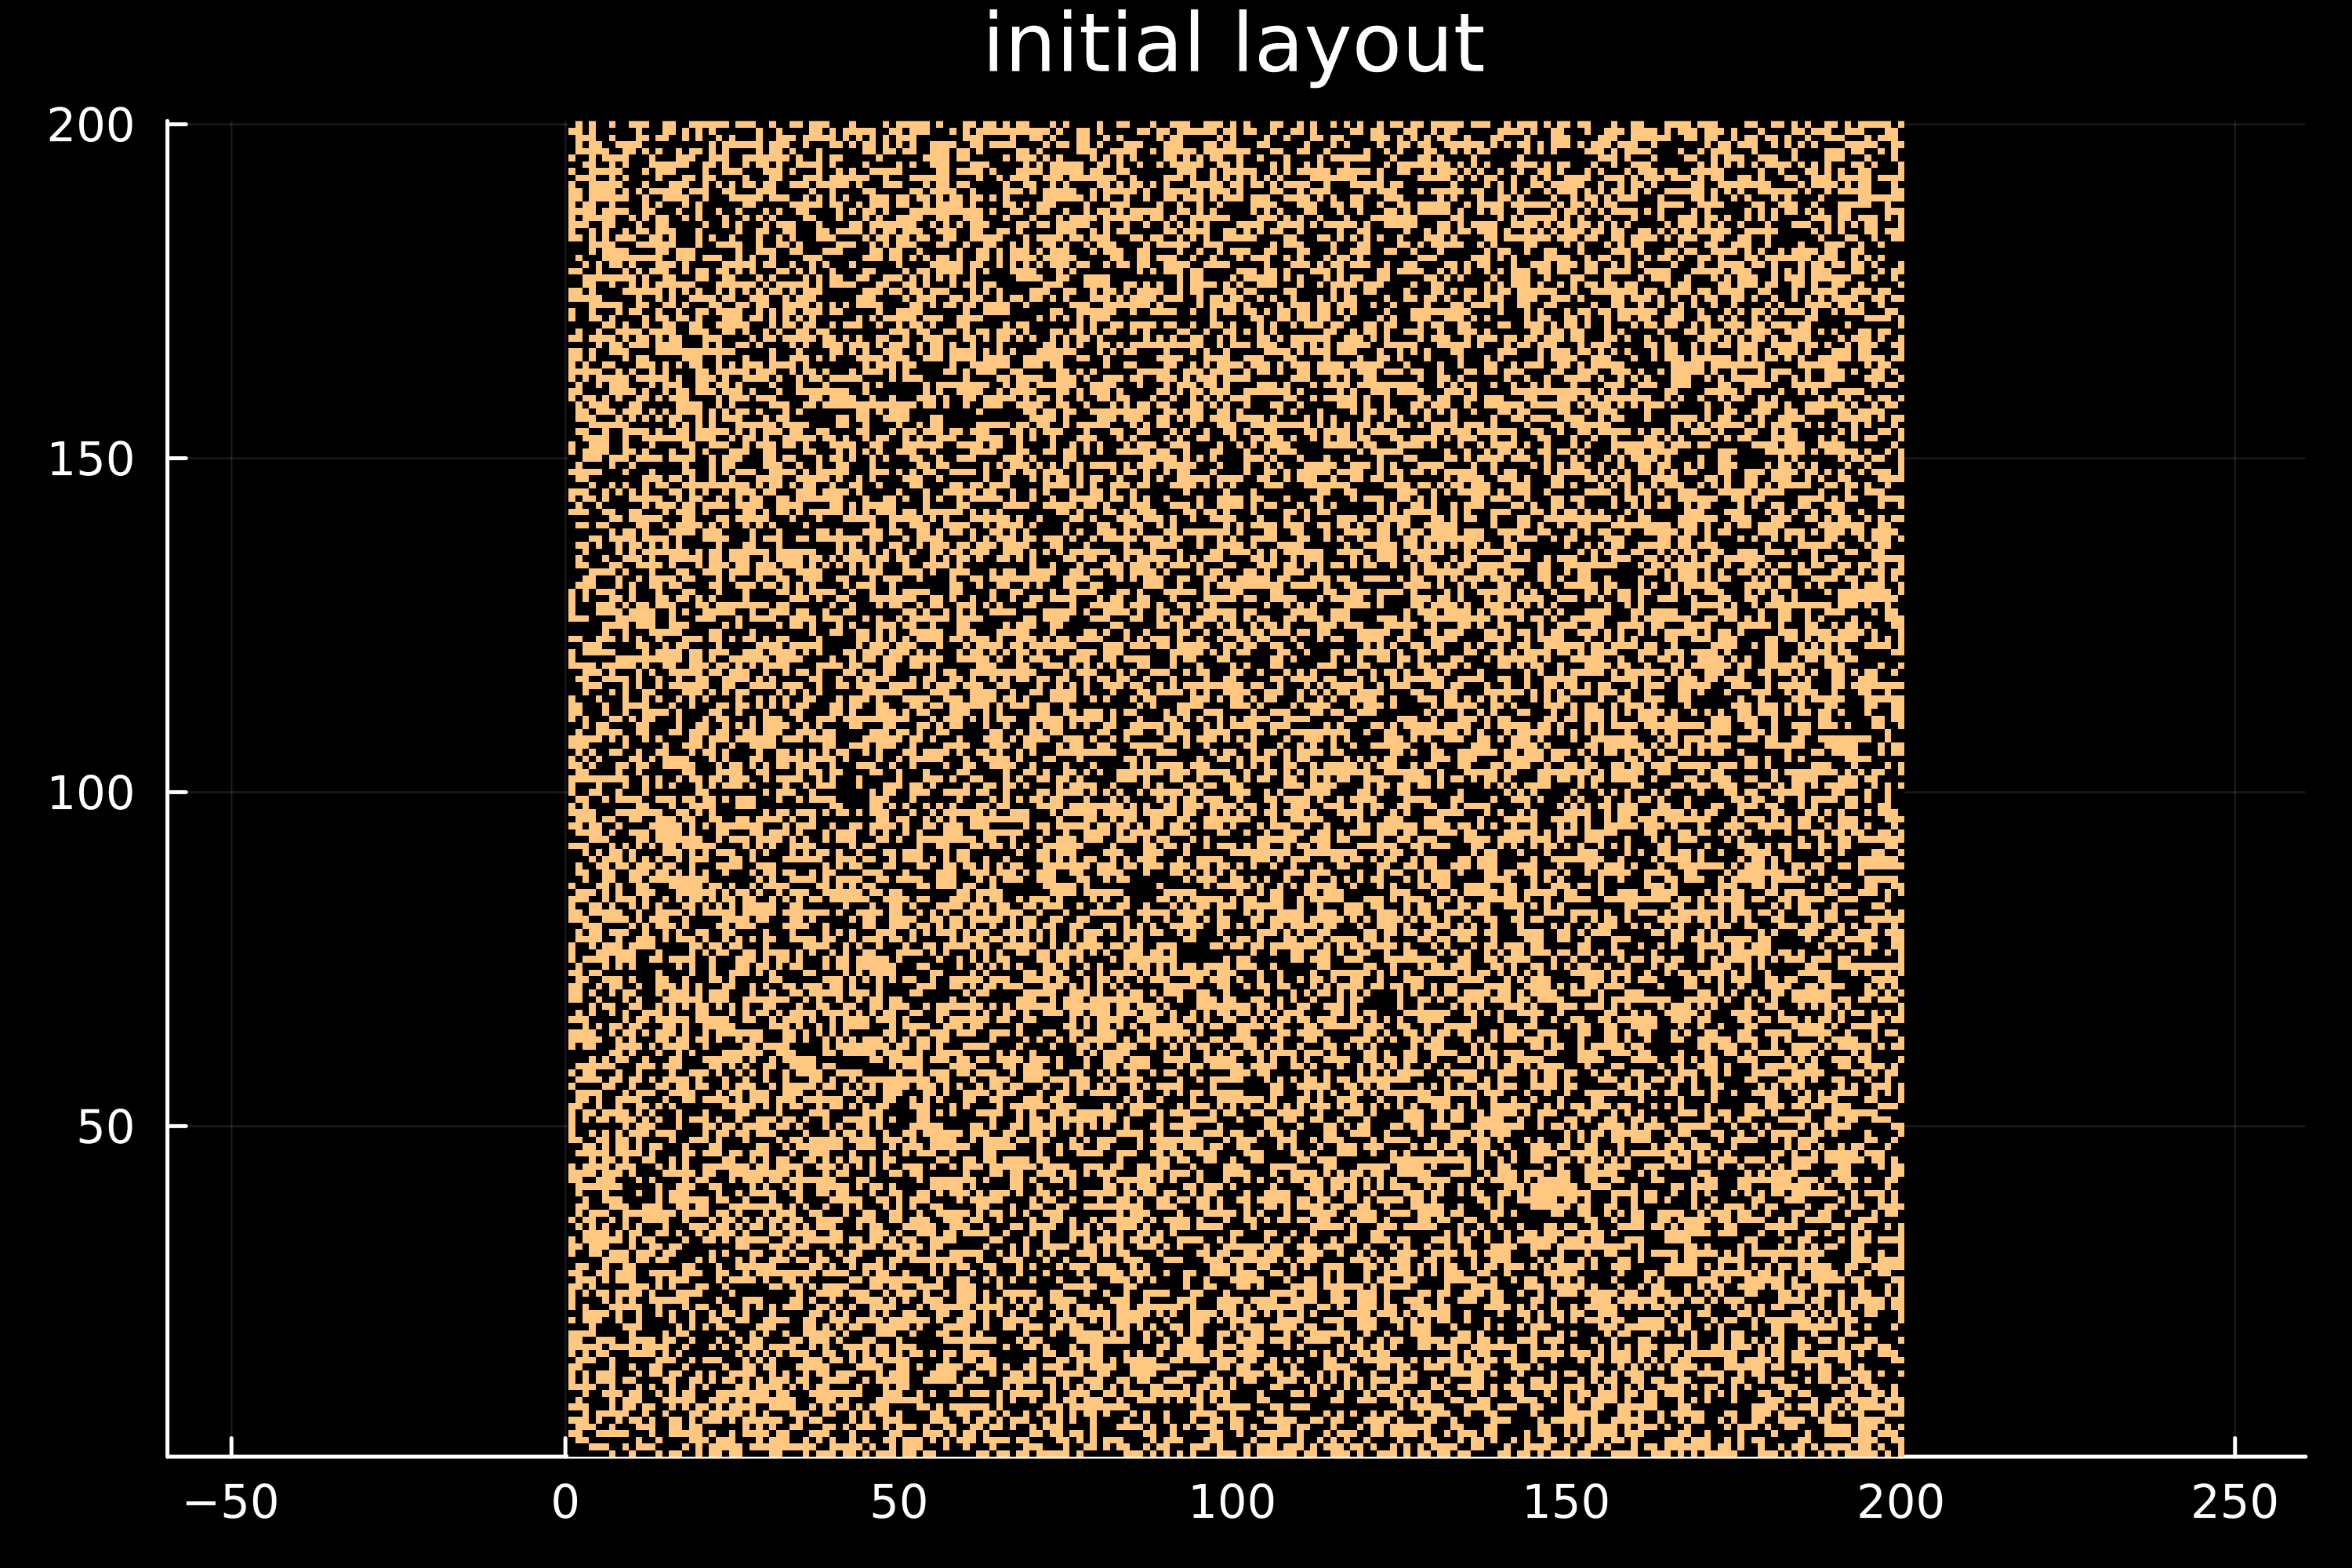

In [122]:
L = 200
J = 5
T = 10
stepCount = 100 * L^2
matrix, Ps = init(L, T, J)
heatmap(matrix, aspectratio = 1, background = :black, color = :copper, legend = false, dpi = 500, title = "initial layout")

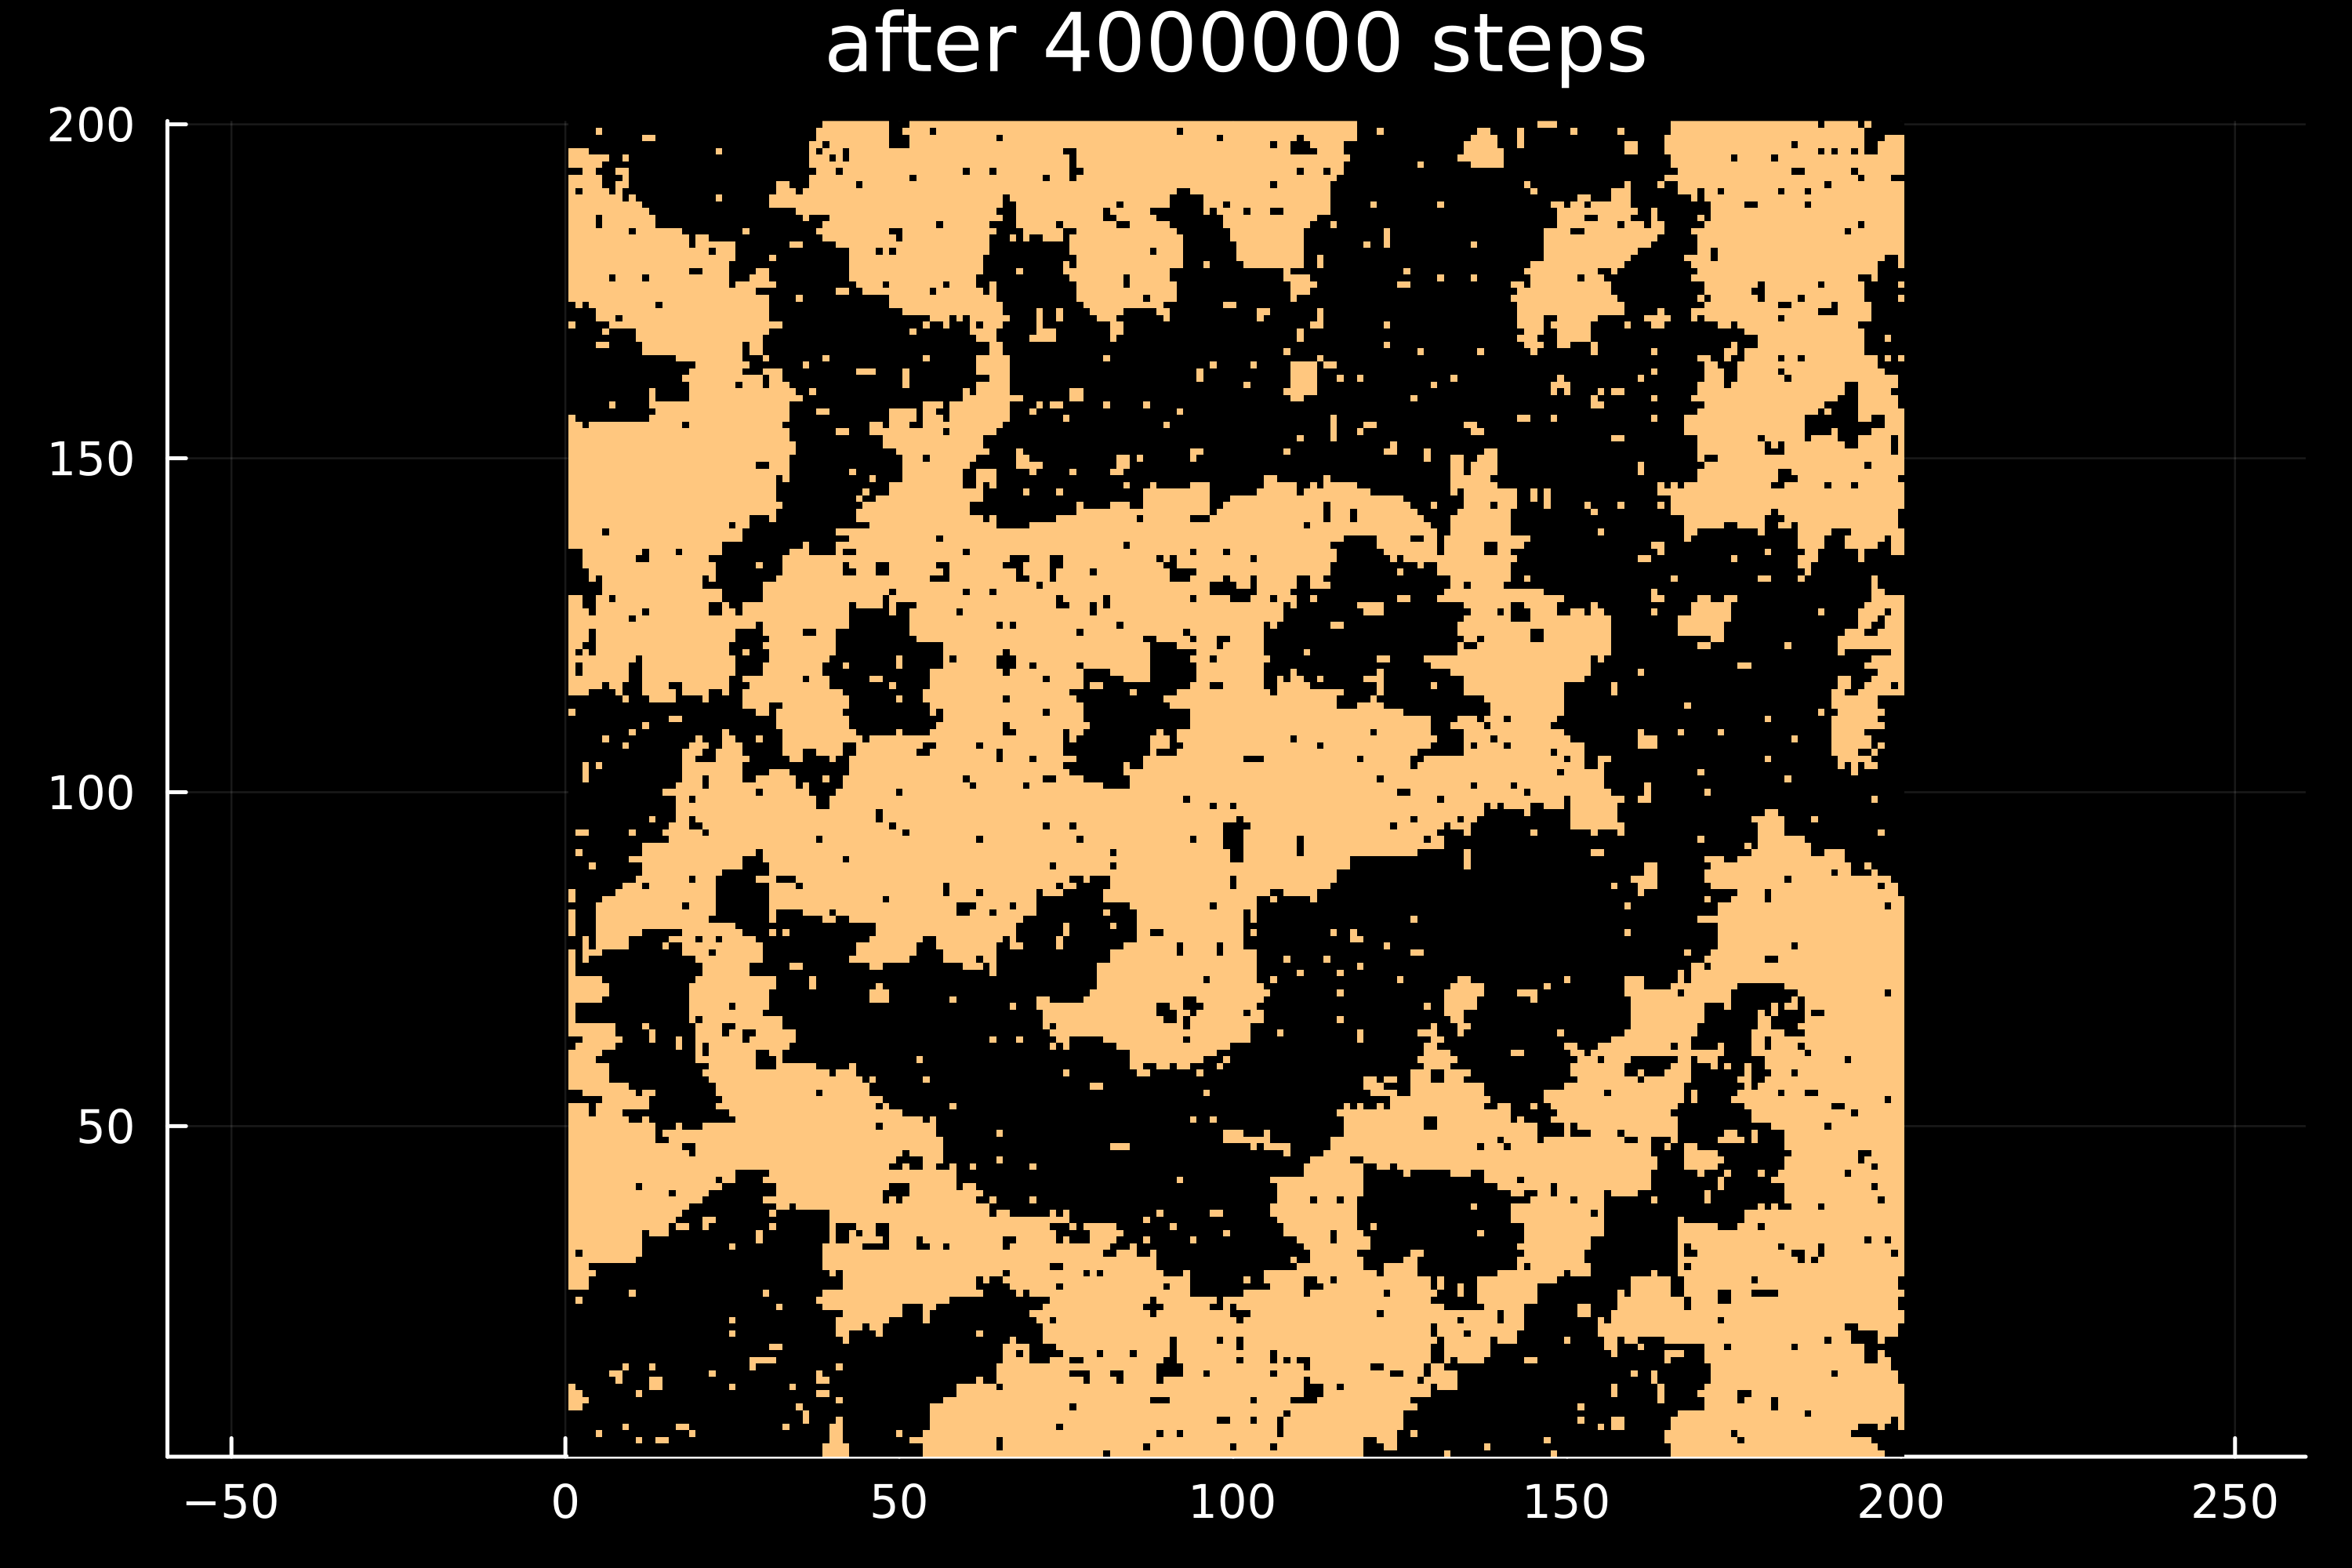

In [123]:
for i in 1:stepCount
    matrix = step(matrix, Ps, L)
end
heatmap(matrix, aspectratio = 1, background = :black, color = :copper, legend = false, dpi = 500, title = "after $stepCount steps")

function that calculates the magnetization of the array

In [124]:
function magnetization(matrix, L)
    count = 0
    for i in 1:L
        for j in 1:L
            count = count + matrix[i, j]
        end
    end
    return count
end

magnetization (generic function with 1 method)

plotting the magnetization based on L and T

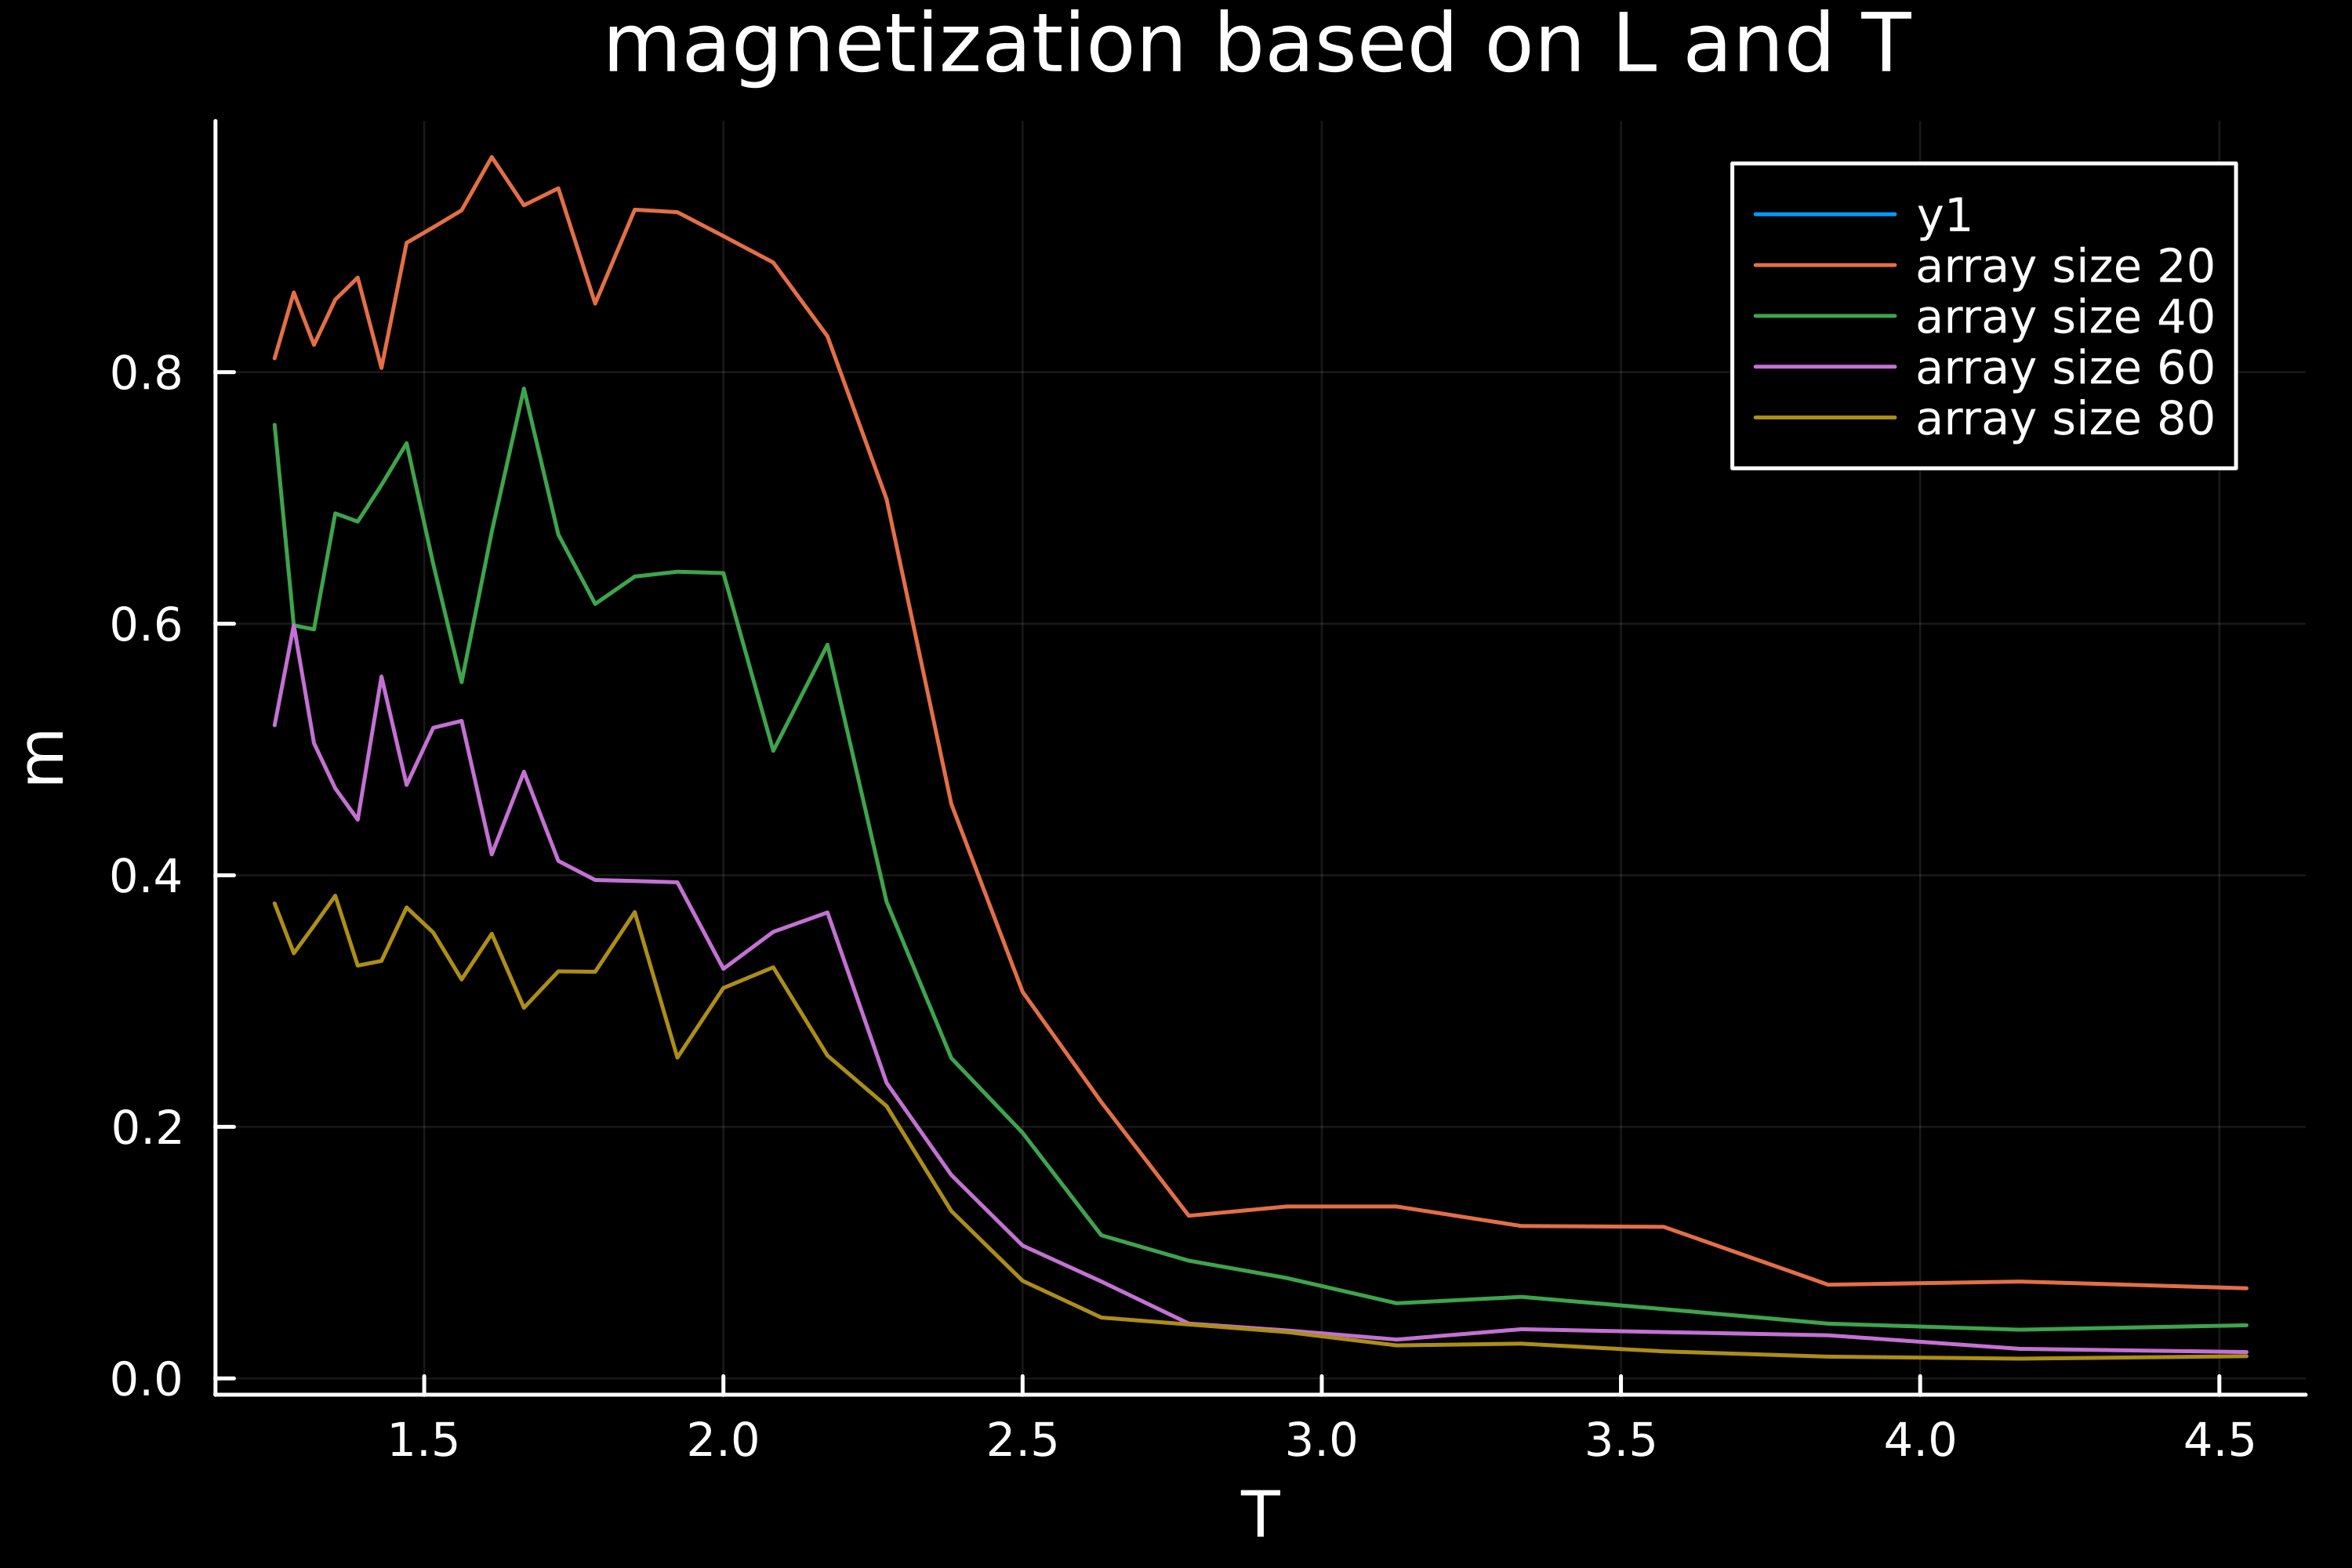

In [137]:
J = 1
plt = plot([], [], background = :black, dpi = 500, title = "magnetization based on L and T", xlabel = "T", ylabel = "m")

Ts = []
for j in 1:30
    oneOverT = 0.2 + j * 0.02
    T = 1 / oneOverT
    push!(Ts, T)
end

for i in 1:4
    L = 20 * i
    M = zeros(30)
    for j in 1:30
        oneOverT = 0.2 + j * 0.02
        T = 1 / oneOverT
        results = []
        for k in 1:30
            matrix, Ps = init(L, T, J)
            for i in 1:300 * L^2
                matrix = step(matrix, Ps, L)
            end
            push!(results, abs(magnetization(matrix, L)) / (L^2))
        end
        M[j] = mean(results)
    end
    plot!(Ts, M, label = "array size $L")
end
display(plt)